# map_to_regions maps

## Import packages

In [1]:
import numpy as np
import porespy as ps
import openpnm as op
import matplotlib.pyplot as plt

ws = op.Workspace()
ws.settings['loglevel'] = 50
np.random.seed(10)
ps.visualization.set_mpl_style()

## Create image and extract network

In [2]:
im = ps.generators.blobs(shape=[400, 400], porosity=0.6)
snow_output = ps.networks.snow2(im, boundary_width=10)

## Plot the pore network:

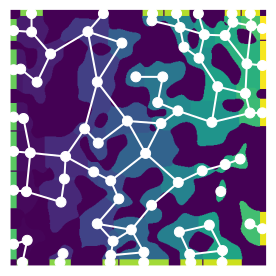

In [3]:
pn, geo = op.io.PoreSpy.import_data(snow_output.network)
fig = plt.figure(figsize=[4, 4])
fig = op.topotools.plot_connections(pn, c='w', linewidth=2, fig=fig)
fig = op.topotools.plot_coordinates(pn, c='w', s=100, fig=fig)
plt.imshow(snow_output.regions.T, origin='lower')
plt.axis('off');

Now assign some values to the network:

In [4]:
pn['pore.values'] = np.random.rand(pn.Np)

And now assign these values to the image regions:

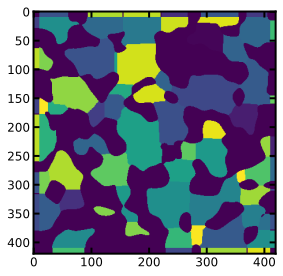

In [5]:
reg = ps.networks.map_to_regions(regions=snow_output.regions, values=pn['pore.values'])
plt.imshow(reg)